In [1]:
from zero_traffic.imports import * 
from zero_traffic import proc_data
from zero_traffic import plot as pl

# Overview of Traffic Data

This dataset is derived from the TomTom Developer API (documentation [here](https://developer.tomtom.com/traffic-api/documentation/product-information/introduction)). 

An automated process has been applied to collect traffic flow data for a selection of geographic locations. Every 15 minutes, the API is called and data is collected for every location. 

This codebase includes a function which aggregates the data and returns a dataframe:

In [2]:
df = proc_data.load_data_archive()
df.head(5)

,path,timestamp_float,place_description,datetime,currentSpeed,freeFlowSpeed,confidence,roadClosure,speed_percent,hour,day
0,/l/gds/zero-traffic-data/I70-I70W@Empire-Ex232...,1.724079e+09,I70-I70W@Empire-Ex232,2024-08-19 08:44:21.948355913-06:00,109.0,109.0,1.0,False,1.0,8,2024-08-19 00:00:00-06:00
1,/l/gds/zero-traffic-data/I70-I70W@Empire-Ex232...,1.724079e+09,I70-I70W@Empire-Ex232,2024-08-19 08:46:46.664937019-06:00,109.0,109.0,1.0,False,1.0,8,2024-08-19 00:00:00-06:00
2,/l/gds/zero-traffic-data/I70-I70W@Empire-Ex232...,1.724079e+09,I70-I70W@Empire-Ex232,2024-08-19 08:49:56.803361893-06:00,104.0,104.0,1.0,False,1.0,8,2024-08-19 00:00:00-06:00
3,/l/gds/zero-traffic-data/I70-I70W@Empire-Ex232...,1.724080e+09,I70-I70W@Empire-Ex232,2024-08-19 09:00:03.287034988-06:00,104.0,104.0,1.0,False,1.0,9,2024-08-19 00:00:00-06:00
4,/l/gds/zero-traffic-data/I70-I70W@Empire-Ex232...,1.724081e+09,I70-I70W@Empire-Ex232,2024-08-19 09:15:03.766738892-06:00,104.0,104.0,1.0,False,1.0,9,2024-08-19 00:00:00-06:00


Here are the names for each of the places that are included in the data:

In [3]:
df.groupby('place_description')['datetime'].describe()[['count', 'min', 'max']]

,count,min,max
place_description,,,
I70-I70W@Empire-Ex232,5092,2024-08-19 08:44:21.948355913-06:00,2024-10-11 11:30:02.906169891-06:00
I70-I70W@Evergreen-Ex244,4,2024-08-19 08:46:47.067600965-06:00,2024-09-17 06:16:18.979486942-06:00
I70-I70W@GeneseePark-Ex254,5098,2024-08-19 08:10:47.949558020-06:00,2024-10-11 11:30:02.529679060-06:00
I70-I70W@IDSprings-Ex241,5097,2024-08-19 08:10:48.190397024-06:00,2024-10-11 11:30:02.723093033-06:00
denver-I25@104th,5189,2024-08-18 10:06:39.167459965-06:00,2024-10-11 11:30:01.984972-06:00
denver-I25@I70,5191,2024-08-18 10:02:14.966093063-06:00,2024-10-11 11:30:01.781835079-06:00
denver-I25@I76,5093,2024-08-19 08:39:44.229732990-06:00,2024-10-11 11:30:01.573999882-06:00
denver-I70@I76,5093,2024-08-19 08:39:45.304296970-06:00,2024-10-11 11:30:02.153994083-06:00
denver-I70W@Hwy40,5097,2024-08-19 08:10:47.678004980-06:00,2024-10-11 11:30:02.342242956-06:00


For this notebook, let's focus on the Denver I25 locations and observations made between 5 AM and 9 PM:

In [4]:
m = df['place_description'].str.contains('denver-I25')
m &= df['hour'].between(5, 21)
df = (df[m]
        .sort_values(by=['datetime']).reset_index(drop=True)
        .copy())
print(df.shape)
df.head(5)

(10975, 11)


,path,timestamp_float,place_description,datetime,currentSpeed,freeFlowSpeed,confidence,roadClosure,speed_percent,hour,day
0,/l/gds/zero-traffic-data/denver-I25@I70/172399...,1.723997e+09,denver-I25@I70,2024-08-18 10:02:14.966093063-06:00,103.0,103.0,1.0,False,1.0,10,2024-08-18 00:00:00-06:00
1,/l/gds/zero-traffic-data/denver-I25@I70/172399...,1.723997e+09,denver-I25@I70,2024-08-18 10:06:38.905229092-06:00,103.0,103.0,1.0,False,1.0,10,2024-08-18 00:00:00-06:00
2,/l/gds/zero-traffic-data/denver-I25@104th/1723...,1.723997e+09,denver-I25@104th,2024-08-18 10:06:39.167459965-06:00,108.0,108.0,1.0,False,1.0,10,2024-08-18 00:00:00-06:00
3,/l/gds/zero-traffic-data/denver-I25@I70/172399...,1.723997e+09,denver-I25@I70,2024-08-18 10:07:52.030534029-06:00,103.0,103.0,1.0,False,1.0,10,2024-08-18 00:00:00-06:00
4,/l/gds/zero-traffic-data/denver-I25@104th/1723...,1.723997e+09,denver-I25@104th,2024-08-18 10:07:52.282229900-06:00,108.0,108.0,1.0,False,1.0,10,2024-08-18 00:00:00-06:00


The primary variable of interest for these data is `speed_percent`, which is the ratio of `currentSpeed` to `freeFlowSpeed`. For example, if the current speed is 37.5 MPH and the free flow speed is 75 MPH, then the `speed_percent` would be $0.5$.

# Analysis

In this notebook, we want to use these data to better understand traffic congestion patterns. Basically, at what times is traffic likely to be slow? 

The first thing we can do is create a histogram that shows the distribution of traffic flow:

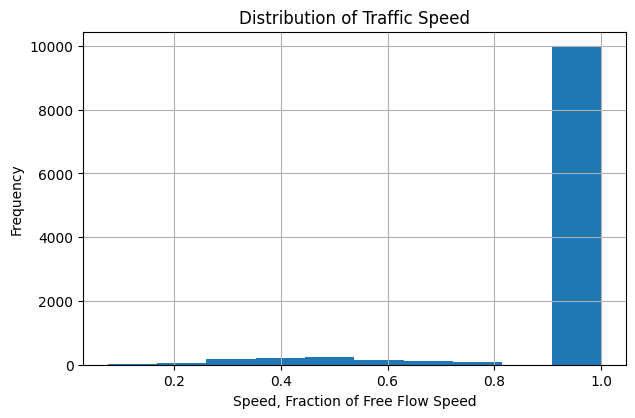

In [5]:
WIDTH = 7
title = 'Distribution of Traffic Speed'
xlab = 'Speed, Fraction of Free Flow Speed'
df['speed_percent'].plot(kind='hist', figsize=(WIDTH, WIDTH/1.618), grid=True, 
                         title=title, xlabel=xlab);

...we can see that most of the time, the traffic is in the free-flow state (i.e. `speed_percent` equals 1). 

Let's look at only cases where traffic is slower than free-flow speed:

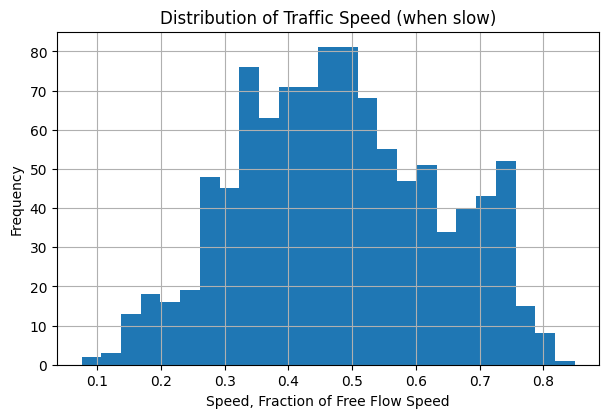

In [6]:
m = df['speed_percent'] < 1
title = 'Distribution of Traffic Speed (when slow)'
df.loc[m, 'speed_percent'].plot(kind='hist', figsize=(WIDTH, WIDTH/1.618), grid=True, 
                                bins=25, title=title, xlabel=xlab);

...here, we can better understand the distribution of slow traffic speeds. When traffic is slower than the free-flow speed, it tends to be about 50% of free flow speed, but most of the values of the distribution are contained in the range 20% to 80%. 

Now, let's dig in further and analyze patterns by time of day; and we'll look at weekdays first:

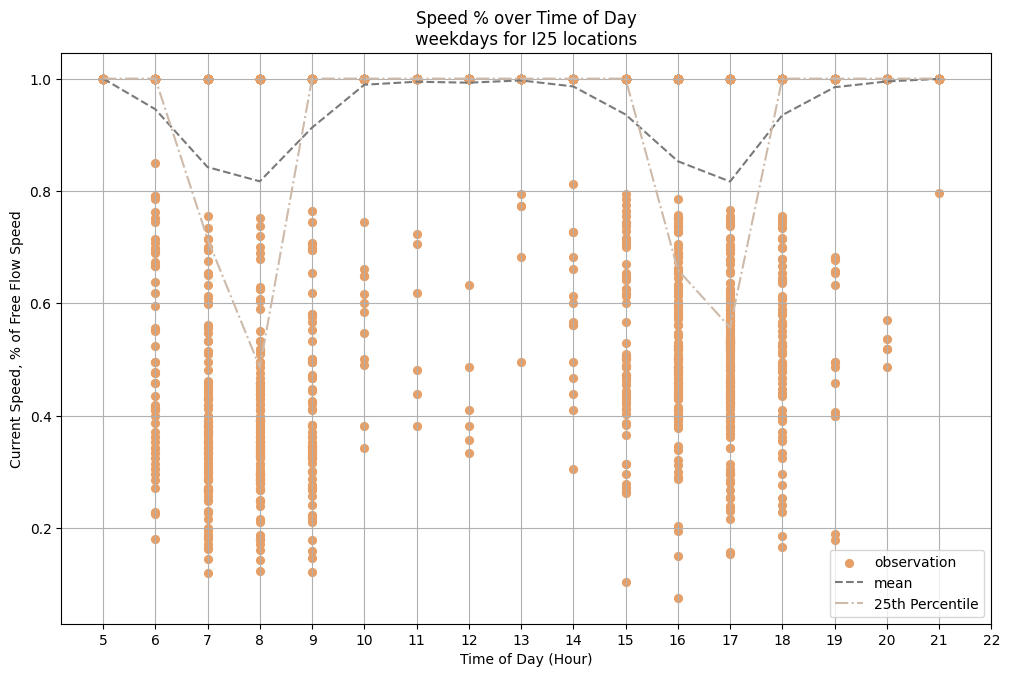

In [7]:
is_weekend = df['datetime'].dt.strftime('%a').isin(['Sat', 'Sun'])
fig = pl.basic_scatter(df[~is_weekend], subtitle='weekdays for I25 locations');

In the above graph, we can see that traffic congestion appears the most between 6-10 AM and between 3-6PM. 

Now let's examine the pattern for weekends:

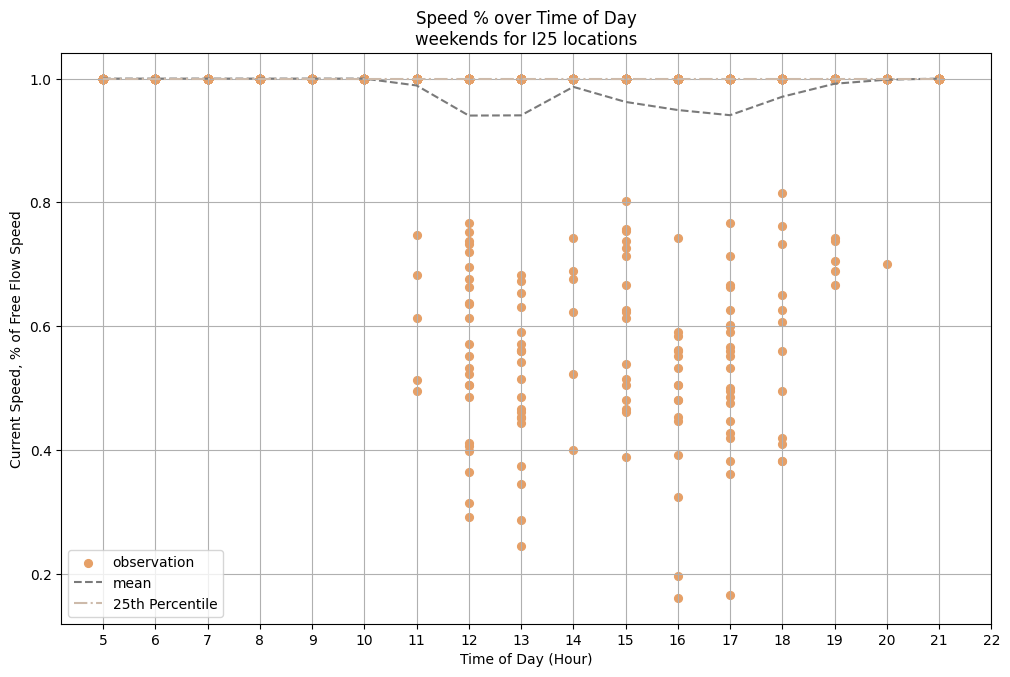

In [8]:
fig = pl.basic_scatter(df[is_weekend], subtitle='weekends for I25 locations');

In the above graph, we can see that weekend mornings are always free from congestion in these data; and we can see that there is some chance of encountering congestion between 11AM and about 7PM. 